# Определение перспективного тарифа для телеком компании

---
**Цель проекта:** проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

---

Коммерческому департаменту компании «Мегалайн» необходимо понять, какой из предложенных клиентам тарифов приносит больше прибыли.Компания предоставляет данные 500 пользователей тарифов «Смарт» и «Ультра» за 2018 год.

Исходные данные: 
    
    calls - данные о звонках:
        id — уникальный номер звонка
        call_date — дата звонка
        duration — длительность звонка в минутах
        user_id — идентификатор пользователя, сделавшего звонок
        
    users - данные о пользователях:
        user_id — уникальный идентификатор пользователя
        first_name — имя пользователя
        last_name — фамилия пользователя
        age — возраст пользователя (годы)
        reg_date — дата подключения тарифа (день, месяц, год)
        churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
        city — город проживания пользователя
        tarif — название тарифного плана
        
    messages - данные о сообщениях:
        id — уникальный номер сообщения
        message_date — дата сообщения
        user_id — идентификатор пользователя, отправившего сообщение
        
    internet - данные об интернет-сессиях:
        id — уникальный номер сессии
        mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
        session_date — дата интернет-сессии
        user_id — идентификатор пользователя
        
    tariffs - данные о тарифах:
        tariff_name — название тарифа
        rub_monthly_fee — ежемесячная абонентская плата в рублях
        minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
        messages_included — количество сообщений в месяц, включённых в абонентскую плату
        mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
        rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
        rub_per_message — стоимость отправки сообщения сверх тарифного пакета
        rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Предобработка данных

In [2]:
# calls = pd.read_csv('/Users/dianamini/Developer/Data/calls.csv')
# calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [6]:
# users = pd.read_csv('/Users/dianamini/Developer/Data/users.csv')
# users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
users['churn_date'] = users['churn_date'].fillna(value = '2030-01-01')

In [10]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


- Есть пропущенные значения в столбце churn_date. Это значит, что тариф все ще подключен, так что я заменю эти пропуски на неправдоподобное число, чтобы в дальнейшем было удобнее.

In [11]:
# messages = pd.read_csv('/Users/dianamini/Developer/Data/messages.csv')
# messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [15]:
# internet = pd.read_csv('/Users/dianamini/Developer/Data/internet.csv')
# internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [16]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [19]:
# tariffs = pd.read_csv('/Users/dianamini/Developer/Data/tariffs.csv')
# tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [20]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [21]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   rub_monthly_fee        2 non-null      int64  
 4   rub_per_gb             2 non-null      int64  
 5   rub_per_message        2 non-null      int64  
 6   rub_per_minute         2 non-null      int64  
 7   tariff_name            2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(1), int64(7), object(1)
memory usage: 272.0+ bytes


#### Вывод

- Во всех таблицах, кроме tariffs, в столбцах с датами заменила типы данных с object на  datetime
- В таблице users в столбце churn_date заменила пропущенные значения на 2030-01-01, в дальнейшем я буду знать, что это еще действующие подключения на тариф.

## Объединение таблиц

Для начала сгруппирую данные в таблицах calls, messages и internet отдельно по месяцам и user_id

In [22]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [23]:
calls = calls.drop(['call_date'], axis=1)

In [24]:
messages = messages.drop(['message_date'], axis=1)

In [25]:
calls_by_month = calls.groupby(['user_id', 'month', 'id'])['duration'].sum()
calls_by_month = calls.groupby(['user_id', 'month', 'duration'])['id'].count()
calls_by_month = calls_by_month.to_frame().reset_index()
calls_by_month['calls_count'] = calls_by_month['id']
calls_by_month = calls_by_month.drop(['id'], axis = 1)
calls_by_month.head()

,user_id,month,duration,calls_count
0,1000,5,0.00,5
1,1000,5,0.33,1
2,1000,5,1.91,1
3,1000,5,3.43,1
4,1000,5,4.19,1


In [26]:
messages_sum = messages.groupby(['user_id', 'month'])['id'].count()
messages_by_month = messages_sum.to_frame().reset_index()
messages_by_month['messages_count'] = messages_by_month['id']
messages_by_month = messages_by_month.drop(['id'], axis = 1)
messages_by_month.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [27]:
internet = internet.groupby(['user_id', 'month'])['mb_used'].sum()
internet_by_month = internet.to_frame().reset_index()
internet_by_month.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [28]:
users_tariff = users.groupby('user_id')['tariff'].sum()
users_tariff = users_tariff.to_frame().reset_index()
users_tariff.head()

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


In [29]:
calls_pivot = pd.pivot_table(calls_by_month, values=['duration', 'calls_count'], index=['user_id', 'month'], aggfunc=sum).reset_index()
messages_pivot = pd.pivot_table(messages_by_month, values=['messages_count'], index=['user_id', 'month'], aggfunc=sum)
internet_pivot = internet_by_month.set_index(['user_id', 'month'])

users_pivot = users.set_index('user_id')

calls_messages_internet = pd.merge(calls_pivot, internet_pivot, on=['user_id', 'month'], how="outer")
calls_messages_internet = pd.merge(calls_messages_internet, messages_pivot, on=['user_id', 'month'], how='outer')
calls_messages_internet = pd.merge(calls_messages_internet, users_pivot, on='user_id', how='outer')
calls_messages_internet = calls_messages_internet.fillna({'month':-1,
                                                          'messages_count': 0,
                                                          'calls_count': 0,
                                                          'duration': 0,
                                                          'mb_used': 0
                                                         })
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,150.06,2253.49,22.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,158.90,23233.77,60.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,317.35,14003.64,75.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,389.87,14055.93,81.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,431.77,14568.91,57.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.00,19559.44,21.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,0.0,0.00,17491.56,20.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,0.0,0.00,17322.51,35.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,-1.0,0.0,0.00,0.00,0.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [30]:
len(calls_messages_internet.reset_index()['user_id'].unique())

500

In [31]:
calls_messages_internet['gb_used'] = calls_messages_internet['mb_used'] / 1024
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used
0,1000,5.0,22.0,150.06,2253.49,22.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.200674
1,1000,6.0,43.0,158.90,23233.77,60.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,22.689229
2,1000,7.0,47.0,317.35,14003.64,75.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,13.675430
3,1000,8.0,52.0,389.87,14055.93,81.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,13.726494
4,1000,9.0,58.0,431.77,14568.91,57.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.227451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.00,19559.44,21.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,19.101016
3212,1489,11.0,0.0,0.00,17491.56,20.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,17.081602
3213,1489,12.0,0.0,0.00,17322.51,35.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,16.916514
3214,1128,-1.0,0.0,0.00,0.00,0.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0.000000


In [32]:
calls_messages_internet['duration'] = calls_messages_internet['duration'].apply(np.ceil).astype(int)
calls_messages_internet['gb_used'] = calls_messages_internet['gb_used'].apply(np.ceil)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used
0,1000,5.0,22.0,151,2253.49,22.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0
1,1000,6.0,43.0,159,23233.77,60.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0
2,1000,7.0,47.0,318,14003.64,75.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0
3,1000,8.0,52.0,390,14055.93,81.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0
4,1000,9.0,58.0,432,14568.91,57.0,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0,19559.44,21.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,20.0
3212,1489,11.0,0.0,0,17491.56,20.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,18.0
3213,1489,12.0,0.0,0,17322.51,35.0,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,17.0
3214,1128,-1.0,0.0,0,0.00,0.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0


In [33]:
calls_messages_internet['mb_used'].isna().sum()

0

In [34]:
calls_messages_internet['gb_used'].isna().sum()

0

In [35]:
calls_messages_internet['messages_count'].isna().sum()

0

In [36]:
calls_messages_internet['mb_used'] = calls_messages_internet['mb_used'].fillna(value=0)
calls_messages_internet['gb_used'] = calls_messages_internet['gb_used'].fillna(value=0)
calls_messages_internet['messages_count'] = calls_messages_internet['messages_count'].fillna(value=0)

In [37]:
calls_messages_internet['gb_used'] = calls_messages_internet['gb_used'].astype(int)
calls_messages_internet['messages_count'] = calls_messages_internet['messages_count'].astype(int)
calls_messages_internet['month'] = calls_messages_internet['month'].astype(int)
calls_messages_internet['calls_count'] = calls_messages_internet['calls_count'].astype(int)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,20
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,18
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,17
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0


- Объединила необходимые таблицы
- Округлила в большкю сторону время звонков и гигабайты интернета
- Изменила типы данных на int для удобства

## Расчет помесячной выручки с каждого пользователя

In [38]:
def messages_included(row):
    if row['tariff'] == 'ultra':
        return 1000
    else:
        return 50

calls_messages_internet['messages_included'] = calls_messages_internet.apply(messages_included, axis = 1)
calls_messages_internet.head()

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,messages_included
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1000
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1000


In [39]:
def minutes_included(row):
    if row['tariff'] == 'ultra':
        return 3000
    else:
        return 500

calls_messages_internet['minutes_included'] = calls_messages_internet.apply(minutes_included, axis = 1)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,messages_included,minutes_included
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000,3000
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1000,3000
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,20,50,500
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,18,50,500
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,17,50,500
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0,1000,3000


In [40]:
def gb_per_month_included(row):
    if row['tariff'] == 'ultra':
        return 30
    else:
        return 15

calls_messages_internet['gb_per_month_included'] = calls_messages_internet.apply(gb_per_month_included, axis = 1)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,messages_included,minutes_included,gb_per_month_included
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000,3000,30
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1000,3000,30
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,30
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,30
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1000,3000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,20,50,500,15
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,18,50,500,15
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,17,50,500,15
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0,1000,3000,30


In [41]:
def rub_per_minute_message(row):
    if row['tariff'] == 'ultra':
        return 1
    else:
        return 3

calls_messages_internet['rub_per_minute_message'] = calls_messages_internet.apply(rub_per_minute_message, axis = 1)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000,3000,30,1
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1000,3000,30,1
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,30,1
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,30,1
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1000,3000,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,20,50,500,15,3
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,18,50,500,15,3
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,17,50,500,15,3
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0,1000,3000,30,1


In [42]:
def rub_per_gb(row):
    if row['tariff'] == 'ultra':
        return 150
    else:
        return 200

calls_messages_internet['rub_per_gb'] = calls_messages_internet.apply(rub_per_gb, axis = 1)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000,3000,30,1,150
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1000,3000,30,1,150
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,30,1,150
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,30,1,150
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1000,3000,30,1,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,20,50,500,15,3,200
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,18,50,500,15,3,200
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,17,50,500,15,3,200
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0,1000,3000,30,1,150


In [43]:
def rub_monthly_fee(row):
    if row['tariff'] == 'ultra':
        return 1950
    else:
        return 550

calls_messages_internet['rub_monthly_fee'] = calls_messages_internet.apply(rub_monthly_fee, axis = 1)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000,3000,30,1,150,1950
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1000,3000,30,1,150,1950
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,30,1,150,1950
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,30,1,150,1950
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1000,3000,30,1,150,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,20,50,500,15,3,200,550
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,18,50,500,15,3,200,550
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,17,50,500,15,3,200,550
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0,1000,3000,30,1,150,1950


In [44]:
def remainder(row):
    remainder = 0
    if row['duration'] <= row['minutes_included']:
        return 0
    else:
        remainder = row['duration'] - row['minutes_included']
        return remainder
    
calls_messages_internet['remainder_minutes'] = calls_messages_internet.apply(remainder, axis=1)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,reg_date,tariff,gb_used,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,...,2018-05-25,ultra,3,1000,3000,30,1,150,1950,0
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,...,2018-05-25,ultra,23,1000,3000,30,1,150,1950,0
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,...,2018-05-25,ultra,14,1000,3000,30,1,150,1950,0
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,...,2018-05-25,ultra,14,1000,3000,30,1,150,1950,0
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,...,2018-05-25,ultra,15,1000,3000,30,1,150,1950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,...,2018-08-15,smart,20,50,500,15,3,200,550,0
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,...,2018-08-15,smart,18,50,500,15,3,200,550,0
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,...,2018-08-15,smart,17,50,500,15,3,200,550,0
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,...,2018-12-15,ultra,0,1000,3000,30,1,150,1950,0


In [45]:
def remainder(row):
    remainder = 0
    if row['messages_count'] <= row['messages_included']:
        return 0
    else:
        remainder = row['messages_count'] - row['messages_included']
        return remainder
    
calls_messages_internet['remainder_messages'] = calls_messages_internet.apply(remainder, axis=1)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,tariff,gb_used,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,...,ultra,3,1000,3000,30,1,150,1950,0,0
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,...,ultra,23,1000,3000,30,1,150,1950,0,0
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,...,ultra,14,1000,3000,30,1,150,1950,0,0
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,...,ultra,14,1000,3000,30,1,150,1950,0,0
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,...,ultra,15,1000,3000,30,1,150,1950,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,...,smart,20,50,500,15,3,200,550,0,0
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,...,smart,18,50,500,15,3,200,550,0,0
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,...,smart,17,50,500,15,3,200,550,0,0
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,...,ultra,0,1000,3000,30,1,150,1950,0,0


In [46]:
def remainder(row):
    remainder = 0
    if row['gb_used'] <= row['gb_per_month_included']:
        return 0
    else:
        remainder = row['gb_used'] - row['gb_per_month_included']
        return remainder
    
calls_messages_internet['remainder_gb'] = calls_messages_internet.apply(remainder, axis=1)
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,gb_used,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,...,3,1000,3000,30,1,150,1950,0,0,0
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,...,23,1000,3000,30,1,150,1950,0,0,0
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,...,14,1000,3000,30,1,150,1950,0,0,0
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,...,14,1000,3000,30,1,150,1950,0,0,0
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,...,15,1000,3000,30,1,150,1950,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,...,20,50,500,15,3,200,550,0,0,5
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,...,18,50,500,15,3,200,550,0,0,3
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,...,17,50,500,15,3,200,550,0,0,2
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,...,0,1000,3000,30,1,150,1950,0,0,0


In [47]:
def total_price(row):
    total = 0
    total = (row['remainder_minutes'] * row['rub_per_minute_message']) + (row['remainder_messages'] * row['rub_per_minute_message']) + (row['remainder_gb'] * row['rub_per_gb']) + row['rub_monthly_fee']
    return total

calls_messages_internet['total_price'] = calls_messages_internet.apply(total_price, axis=1)
calls_messages_internet
    

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb,total_price
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,5,1550
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,3,1150
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,2,950
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,...,1000,3000,30,1,150,1950,0,0,0,1950


- Добавила в общую таблицу данные из таблицы tariffs 
- Вывела в столбец total траты пользователей за месяц

## Анализ данных

In [48]:
calls_messages_internet

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb,total_price
0,1000,5,22,151,2253.49,22,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
1,1000,6,43,159,23233.77,60,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
2,1000,7,47,318,14003.64,75,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
3,1000,8,52,390,14055.93,81,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
4,1000,9,58,432,14568.91,57,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,19559.44,21,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,5,1550
3212,1489,11,0,0,17491.56,20,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,3,1150
3213,1489,12,0,0,17322.51,35,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,2,950
3214,1128,-1,0,0,0.00,0,51,2018-12-23,Волжский,Ксения,...,1000,3000,30,1,150,1950,0,0,0,1950


In [49]:
pd.set_option('display.float_format', '{:,.2f}'.format)
tariffs_meaning = calls_messages_internet.pivot_table(index = 'tariff', values = ['duration', 'messages_count', 'mb_used'], aggfunc = ['mean', 'std', 'var'])
tariffs_meaning

mean                               std                           \
       duration   mb_used messages_count duration   mb_used messages_count   
tariff                                                                       
smart    389.67 16,201.12          33.37   176.55  5,879.19          28.23   
ultra    488.07 19,449.06          49.31   291.86 10,101.10          47.81   

             var                                
        duration        mb_used messages_count  
tariff                                          
smart  31,170.50  34,564,843.48         796.96  
ultra  85,179.62 102,032,129.46       2,285.42

In [50]:
smart = calls_messages_internet[calls_messages_internet['tariff'] == 'smart']
smart

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb,total_price
8,1001,11,59,409,"18,429.34",0,41,2030-01-01,Москва,Иван,...,50,500,15,3,200,550,0,0,3,1150
9,1001,12,63,392,"14,036.66",0,41,2030-01-01,Москва,Иван,...,50,500,15,3,200,550,0,0,0,550
10,1002,6,15,111,"10,856.82",4,59,2030-01-01,Стерлитамак,Евгений,...,50,500,15,3,200,550,0,0,0,550
11,1002,7,26,205,"17,580.10",11,59,2030-01-01,Стерлитамак,Евгений,...,50,500,15,3,200,550,0,0,3,1150
12,1002,8,42,263,"20,319.26",13,59,2030-01-01,Стерлитамак,Евгений,...,50,500,15,3,200,550,0,0,5,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,1489,9,0,0,"17,206.30",32,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,2,950
3211,1489,10,0,0,"19,559.44",21,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,5,1550
3212,1489,11,0,0,"17,491.56",20,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,3,1150
3213,1489,12,0,0,"17,322.51",35,35,2030-01-01,Санкт-Петербург,Павел,...,50,500,15,3,200,550,0,0,2,950


In [51]:
ultra = calls_messages_internet[calls_messages_internet['tariff'] == 'ultra']
ultra

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb,total_price
0,1000,5,22,151,"2,253.49",22,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
1,1000,6,43,159,"23,233.77",60,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
2,1000,7,47,318,"14,003.64",75,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
3,1000,8,52,390,"14,055.93",81,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
4,1000,9,58,432,"14,568.91",57,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,1473,9,0,0,"17,289.85",19,18,2030-01-01,Красноярск,Николай,...,1000,3000,30,1,150,1950,0,0,0,1950
3206,1473,10,0,0,"13,688.65",20,18,2030-01-01,Красноярск,Николай,...,1000,3000,30,1,150,1950,0,0,0,1950
3207,1473,11,0,0,"21,673.80",14,18,2030-01-01,Красноярск,Николай,...,1000,3000,30,1,150,1950,0,0,0,1950
3208,1473,12,0,0,"18,418.26",20,18,2030-01-01,Красноярск,Николай,...,1000,3000,30,1,150,1950,0,0,0,1950


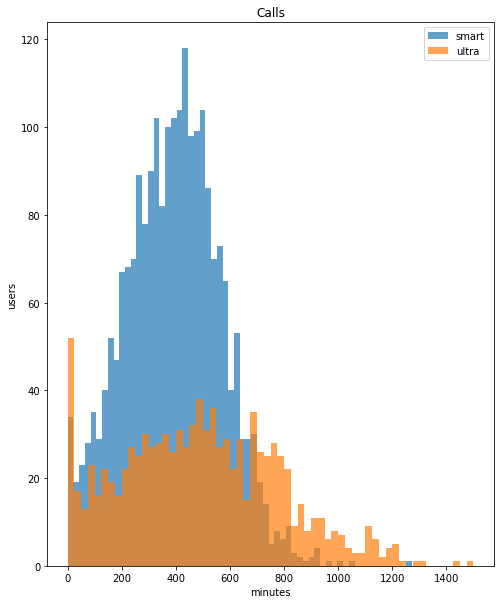

In [52]:
fig, ax = plt.subplots(figsize = (8,10))

ax.hist(smart['duration'], alpha=0.7, bins=60, label = 'smart')
ax.hist(ultra['duration'], alpha=0.7, bins=60, label = 'ultra', range = (0, 1500))
ax.legend()  
ax.set_xlabel('minutes')
ax.set_ylabel('users')
ax.set_title('Calls')

plt.show()

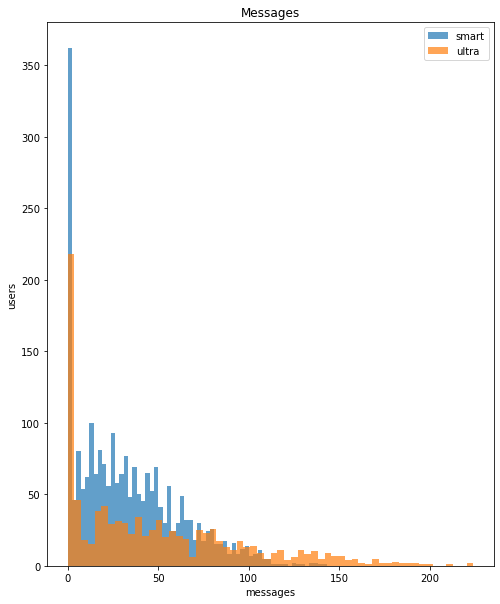

In [53]:
fig, ax = plt.subplots(figsize = (8,10))

ax.hist(smart['messages_count'], alpha=0.7, bins=60, label = 'smart')
ax.hist(ultra['messages_count'], alpha=0.7, bins=60, label = 'ultra')
ax.legend()  
ax.set_xlabel('messages')
ax.set_ylabel('users')
ax.set_title('Messages')

plt.show()


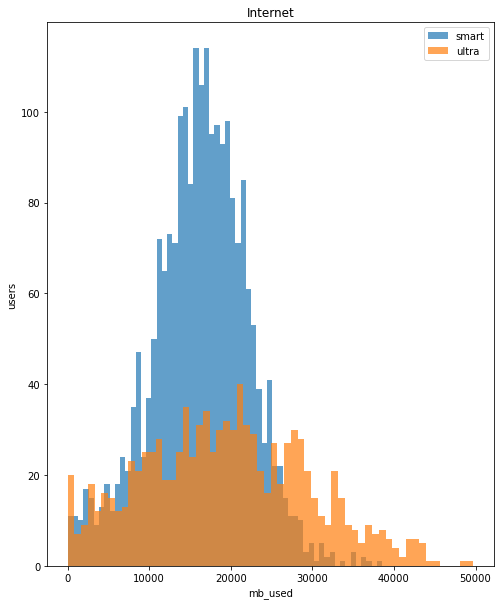

In [54]:
fig, ax = plt.subplots(figsize = (8,10))

ax.hist(smart['mb_used'], alpha=0.7, bins=60, label = 'smart')
ax.hist(ultra['mb_used'], alpha=0.7, bins=60, label = 'ultra')
ax.legend()  
ax.set_xlabel('mb_used')
ax.set_ylabel('users')
ax.set_title('Internet')

plt.show()


In [55]:
ultra_users = ultra['user_id'].nunique()
smart_users = smart['user_id'].nunique()
print('Пользователей в тарифе Smart:', smart_users)
print('Пользователей в тарифе Ultra:', ultra_users)

Пользователей в тарифе Smart: 351
Пользователей в тарифе Ultra: 149


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Пользуйся методом `nunique`.  
</div>

### Вывод

- Пользователи тарифа Smart часто превышают пакет услуг в месяц
- Пользователей тарифом Ultra значительно меньше

Многие пользователи уверены, что тариф смарт дешевле, а значит выгоднее для них. Но гистограммы показывают, что даже если пользователь платит минимальную абонентскую плату, не факт, что это единственные его расходы на мобильную связь и интернет.

## Проверка гипотез

### Гипотеза №1

###### Нулевая гипотеза
Средняя выручка пользователей тарифов "Смарт" и "Ультра" не отличаются друг от друга.


###### Альтернативная гипотеза
Средняя выручка пользователей тарифов "Смарт" и "Ультра" отличаются друг от друга.

In [56]:
smart['total_price'].mean()

1249.303139013453

In [57]:
ultra['total_price'].mean()

2070.030425963489

In [58]:
total_smart = smart['total_price']
 
total_ultra = ultra['total_price']
 
alpha = 0.05
 
results = st.ttest_ind(total_smart, total_ultra)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0971517434404538e-183
Отвергаем нулевую гипотезу


### Гипотеза №2

###### Нулевая гипотеза
Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

###### Альтернативная гипотеза
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [59]:
calls_messages_internet.head()

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,messages_included,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb,total_price
0,1000,5,22,151,"2,253.49",22,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
1,1000,6,43,159,"23,233.77",60,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
2,1000,7,47,318,"14,003.64",75,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
3,1000,8,52,390,"14,055.93",81,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950
4,1000,9,58,432,"14,568.91",57,52,2030-01-01,Краснодар,Рафаил,...,1000,3000,30,1,150,1950,0,0,0,1950


In [60]:
def city_category(row):
    if row['city'] == 'Москва':
        return 'Москва'
    else:
        return 'Другое'

calls_messages_internet['city_category'] = calls_messages_internet.apply(city_category, axis = 1)
calls_messages_internet.head()

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb,total_price,city_category
0,1000,5,22,151,"2,253.49",22,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое
1,1000,6,43,159,"23,233.77",60,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое
2,1000,7,47,318,"14,003.64",75,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое
3,1000,8,52,390,"14,055.93",81,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое
4,1000,9,58,432,"14,568.91",57,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое


In [61]:
moscow = calls_messages_internet[calls_messages_internet['city_category'] == 'Москва']
moscow.head()

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb,total_price,city_category
8,1001,11,59,409,"18,429.34",0,41,2030-01-01,Москва,Иван,...,500,15,3,200,550,0,0,3,1150,Москва
9,1001,12,63,392,"14,036.66",0,41,2030-01-01,Москва,Иван,...,500,15,3,200,550,0,0,0,550,Москва
17,1003,8,55,348,"8,565.21",37,23,2030-01-01,Москва,Белла,...,3000,30,1,150,1950,0,0,0,1950,Москва
18,1003,9,134,889,"12,468.87",91,23,2030-01-01,Москва,Белла,...,3000,30,1,150,1950,0,0,0,1950,Москва
19,1003,10,108,794,"14,768.14",83,23,2030-01-01,Москва,Белла,...,3000,30,1,150,1950,0,0,0,1950,Москва


In [62]:
other = calls_messages_internet[calls_messages_internet['city_category'] == 'Другое']
other.head()

,user_id,month,calls_count,duration,mb_used,messages_count,age,churn_date,city,first_name,...,minutes_included,gb_per_month_included,rub_per_minute_message,rub_per_gb,rub_monthly_fee,remainder_minutes,remainder_messages,remainder_gb,total_price,city_category
0,1000,5,22,151,"2,253.49",22,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое
1,1000,6,43,159,"23,233.77",60,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое
2,1000,7,47,318,"14,003.64",75,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое
3,1000,8,52,390,"14,055.93",81,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое
4,1000,9,58,432,"14,568.91",57,52,2030-01-01,Краснодар,Рафаил,...,3000,30,1,150,1950,0,0,0,1950,Другое


In [63]:
moscow['total_price'].mean()

1522.1440261865794

In [64]:
other['total_price'].mean()

1495.9562380038387

In [65]:
total_moscow = moscow['total_price']
 
total_other = other['total_price']
 
alpha = 0.05
 
results = st.ttest_ind(total_moscow, total_other)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4615228428854483
Не получилось отвергнуть нулевую гипотезу


- Нулевую и альтернативную гипотезы я формулировала как в теории. Нулевая гипотеза с "положительным" результатом, а альтернативная с "отрицательным". 
- Для проверки гипотез я выбрала t-критерий Стьюдента, так как он применяется в случае нормального распределения. 

# Вывод

###### Средняя выручка  пользователей тарифов "Смарт" и "Ультра" отличаются друг от друга.
Подтвердилась альтернативная гипотеза.

Действительно, траты пользователей тарифов отличаются друг от друга. Средняя плата за месяц в тарифе "Ультра" больше, чем в тарифе "Смарт". Но это не значит, что тариф Смарт выгоднее для пользователей. Если сопоставить среднюю плату за месяц с абонентской платтой по каждому тарифу, то мы увидим, что пользователи тарифа "Смарт" на много чаще превышают лимит месечного пакета услуг и переплачивают примерно в два раза.

###### Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
Подтвердилась нулевая гипотеза.

Количество используемых минут, сообщений и мегабайтов не зависит от региона страны. 


Исходя из анализа поведения пользователей услуг комании «Мегалайн» можно сделать вывод:

- Тариф "Ультра" - самый выгодный тариф для пользователей.
- Тариф "Смарт" - самый прибыльный тариф для сетевой компании.